In [154]:
import numpy as np
import matplotlib.pyplot as plt

In [159]:
# Sample thickness
d = 0.01

# Speed of light
c = 299792458

# Permittivity and permeability of air
epsilon_air = 1
mu_air = 2

# Cut of wavelength of coaxial tube
lambda_c = np.pi * (OD - ID)/2 * np.sqrt(epsilon_air * mu_air)

NameError: name 'OD' is not defined

Manufacture data for no sample (air)

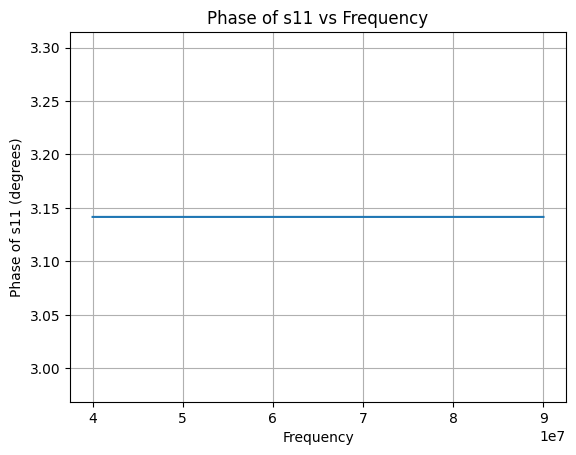

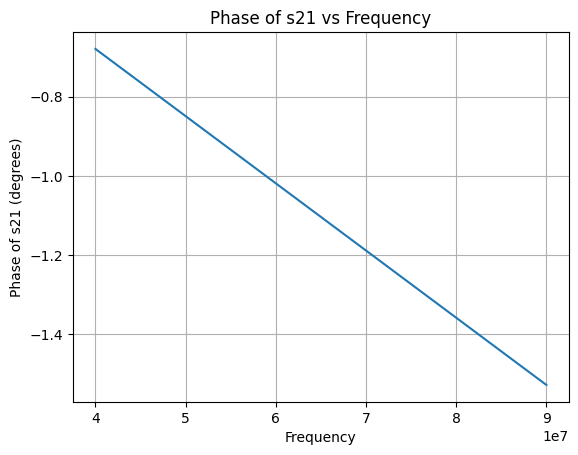

In [156]:
# Produce list of frequencies
data = np.loadtxt('NO_SAMPLE.S2P', skiprows=5)
frequency = data[:, 0]

# Expected phase changes in air
v = c/np.sqrt(epsilon_air*mu_air)
phi_air = 360 * d * frequency / v

# Expect complete transmission and no reflection, so s11 = 0 and s21 = 1
s11 = 10 ** (-50 / 10) * np.ones(len(frequency))* np.exp(1j * np.deg2rad(180))
s21 = (1 - 10 ** (-50 / 10) * np.ones(len(frequency))) * np.exp(1j * -np.deg2rad(phi_air))

# Plot the expected phase changes in air sample
plt.plot(frequency, np.angle(s11))
plt.xlabel('Frequency')
plt.ylabel('Phase of s11 (degrees)')
plt.title('Phase of s11 vs Frequency')
plt.grid(True)
plt.show()

plt.plot(frequency, np.angle(s21, deg=True))
plt.xlabel('Frequency')
plt.ylabel('Phase of s21 (degrees)')
plt.title('Phase of s21 vs Frequency')
plt.grid(True)
plt.show()

The following analysis uses Modern ferrites: Vol. 1, Chapter 7.3.1.1, Pages 167-168

In [157]:
# Calculate the reflection and transmission coefficients
K = (s11**2-s21**2+1)/(2*s11)
R = K+np.sqrt(K**2-1)
T = (s11+s21-R)/(1-(s11+s21)*R)

# Calculate the relative permittivity and permeability
lambda_0 = c / frequency
DG2 = -((lambda_0/(2*np.pi*d))*np.log(1/T))**2

mu_r = np.sqrt(DG2) * (1+R)/(1-R) * 1/np.sqrt(1/lambda_0**2 - 1/lambda_c**2)

print(np.average(epsilon_r))
print(np.average(mu_r))

(1.4142277046972849-0.0015477254764170285j)
(1.4141994202374644-9.082161178879407e-08j)


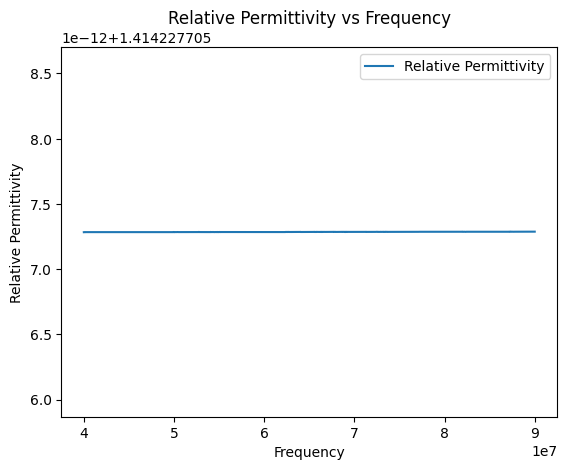

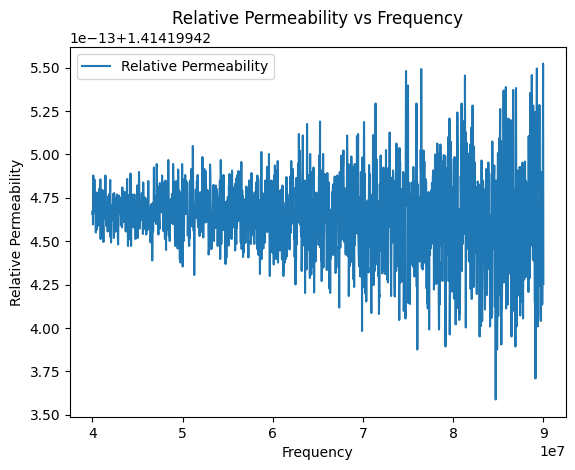

In [158]:
# Plotting the relative permittivity
plt.plot(frequency, epsilon_r, label='Relative Permittivity')
plt.xlabel('Frequency')
plt.ylabel('Relative Permittivity')
plt.title('Relative Permittivity vs Frequency')
plt.legend()
plt.show()

# Plotting the relative permeability
plt.plot(frequency, mu_r, label='Relative Permeability')
plt.xlabel('Frequency')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability vs Frequency')
plt.legend()
plt.show()